In [81]:
import numpy
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [107]:
L = 4
nx = 81
dx = L/nx
u_max = 1
rho_max = 10
nt = 30
dt = dx/u_max
xl = L/2

In [154]:
def flux(rho, u_max, rho_max):
    F = rho*velocity(u_max, rho_max, rho)
    return F

def ftbs(rho0, dt, dx, nt, u_max, rho_max):
    rho = rho0.copy()
    rho_history = [rho0.copy()]
    for i in range(nt):
        F = flux(rho, u_max, rho_max)
        rho[1:] = rho[1:] - (dt/dx)*(F[1:] - F[:-1])
        rho_history.append(rho.copy())
    return rho, rho_history

def velocity(u_max, rho_max, rho):
    u = u_max*(1-(rho/rho_max))
    return u

def ic(rhol, xl, L):
    x, dx = numpy.linspace(0, L, num=nx, retstep=True)
    rho0 = numpy.zeros(len(x))
    mask = numpy.where((x >= 0) & (x < xl))
    rho0[mask] = rhol*(x[mask]/xl)
    return rho0, x


In [202]:
rho_light = 2
rho0, x = ic(rho_light, xl, L)


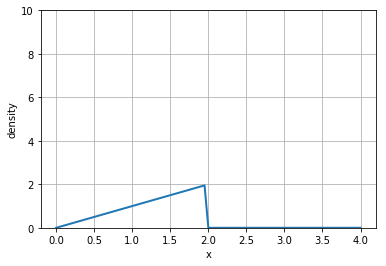

In [203]:
rho_solution, rho_history = ftbs(rho0, dt, dx, nt, u_max, rho_max)
fig = plt.figure(figsize=(6.0, 4.0))
line = plt.plot(x, rho0, color = 'C0',
               linestyle='-', linewidth=2)[0]
plt.ylim(0, 10.0)
plt.xlabel('x')
plt.ylabel('density')
plt.grid()

In [204]:
def update_plot(n, rho_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])
def plot(n, x, rho_hist):
    plt.figure()
    plt.title('Time step: {}'.format(n))
    plt.xlabel('Road')
    plt.ylabel('Traffice density')
    plt.plot(x, rho_hist[n])
    plt.xlim(x[0],x[-1])
    plt.ylim(-0.5, 11.0)
    plt.show()

In [205]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_history,),
                              interval=100)
HTML(anim.to_html5_video())

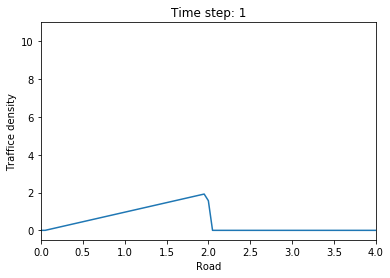

In [206]:
plot(1, x, rho_history)

In [207]:
import ipywidgets
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                     description = 'Time step')
    w = ipywidgets.interactive(plot, n=nt_slider,
                              x=ipywidgets.fixed(x),
                              rho_hist=ipywidgets.fixed(rho_hist))
    return w

In [208]:
interactive_plot(x, rho_history)

interactive(children=(IntSlider(value=0, description='Time step', max=30), Output()), _dom_classes=('widget-in…